In [35]:
# Importing necessary libraries

import tweepy
import re
import pickle

from tweepy import OAuthHandler

In [36]:
# Initializing the keys
consumer_key = "xxxxxxxxxxxxxxxxxxxx"
consumer_secret = "xxxxxxxxxxxxxxxxxxxx"
access_token = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
access_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"


In [37]:
#Accessing tweets from Twitter using the app we created

auth = OAuthHandler(consumer_key,consumer_secret) # Verifies the authenticity of Twitter App
auth.set_access_token(access_token, access_secret) # Verifies the permissions of the access keys
args = ['AmazonFire'] # Tweets related to (search parameter)
api= tweepy.API(auth,timeout=12) # Timeout after 12 seconds

In [38]:
list_tweets = []

query = args[0]
if len(args) == 1: # Verifying that we are only looking for single search parameter
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent').items(200): #Filtering retweets out, setting language to english, and looking for most recent tweets and the top 200 tweets of them
        list_tweets.append(status.text) # Appending fetched tweets(JSON Object: status.text) to a list
        
# print(list_tweets)

In [39]:
# Using our pre-trained model and classifiers to classify the fetched tweets data

with open('tfidfmodel.pickle','rb') as f:
    vectorizer = pickle.load(f)
    
with open('classifier.pickle','rb') as f:
    clf = pickle.load(f)
    
# clf.predict(vectorizer.transform(['Ganesh is a great guy'])) #Testing out with a sample sentence

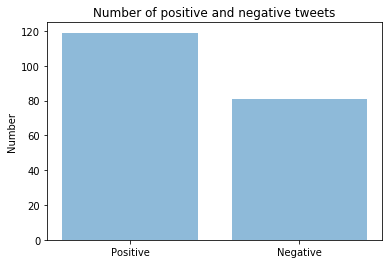

In [40]:
# Pre-processing the fetched tweets

# test_list_tweets = ["I ain't afraid  of  what's gonna happen &%$^ @$@!","They're doing it all  knowingly on Day 5, Day6"]
# Above is a test list to check whether our pre-processing working well or not

tot_pos = 0
tot_neg = 0

for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s","",tweet) # Removing twitter shortened links from start of tweets
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s","",tweet) # Removing twitter shortened links in between tweets
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$","",tweet) # Removing twitter shortened links from end of tweets
    tweet = tweet.lower()
    tweet = re.sub(r"let's"," lets",tweet) # To avoid out of context like below
    tweet = re.sub(r"'s"," is",tweet) # Sometimes goes out of context like let's != let is
    tweet = re.sub(r"'m"," am",tweet)
    tweet = re.sub(r"'re"," are",tweet)
    tweet = re.sub(r"n't"," not",tweet)
    tweet = re.sub(r"ai not","am not",tweet) # Above statement causes this in somecases. So as a precuation using this.
    tweet = re.sub(r"'re'"," are",tweet)
    tweet = re.sub(r"\W"," ",tweet) # Replacing special characters with single space
    tweet = re.sub(r"\d","",tweet) # Removing numericals out of tweets
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet) # Replacing all single characters in middle of a tweet with a single space
    tweet = re.sub(r"^[a-z]\s+"," ",tweet) # Replacing all single characters at start of a tweet with a single space
    tweet = re.sub(r"\s+[a-z]$"," ",tweet) # Replacing all single characters at end of a tweet with a single space
    tweet = re.sub(r"\s+"," ",tweet) # Replacing multiple consecutive white spaces with a single white space
    # print(tweet,"\n")
    
    # Predicting the tweets sentiment using our pre-trained model and classifier
    sent = clf.predict(vectorizer.transform([tweet]).toarray())
    if sent[0] == 1:
        tot_pos += 1
    else:
        tot_neg += 1 
    
# print(tweet,":",sent) # Tweet vs Predicted Sentiment
    
# print("\nPositive Documents:",tot_pos,"\nNegative Documents:",tot_neg)

# Visualizing the sentimental analysis

# Plotting the bar chart
import matplotlib.pyplot as plt
import numpy as np

objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[tot_pos,tot_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of positive and negative tweets')

plt.show()